In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data[:]

In [3]:
def dist(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.sqrt(np.sum(np.square(x-y)))

In [4]:
def center_init(data, k):
    nSamples, dims = data.shape
    center = []
    c_1 = int(np.random.uniform(0, nSamples))
    center.append(data[c_1, :])
    for i in range(1,k):
        dist_i = []
        for j in data:
            dist_j = 0
            for m in range(len(center)):
                dist_j += dist(j, center[m])
            dist_i.append(dist_j)
        index = np.argmax(dist_i)
        center.append(data[index, :])
    return np.array(center)

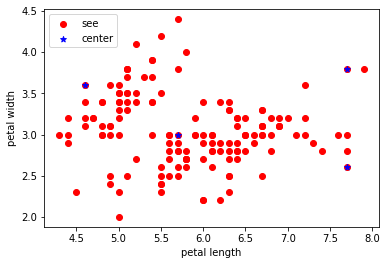

In [5]:
c = center_init(X, 4)
#绘制数据分布图和初始中心位置
plt.scatter(X[:, 0], X[:, 1], c = "red", marker='o', label='see')
plt.scatter(c[:, 0], c[:, 1], c = 'blue', marker='*', label='center')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [6]:
def kmeans(data, k):
    nSamples, dims = data.shape
    center = center_init(data, k)
    labels = np.zeros((nSamples, 2))
    center_changed = True
    while center_changed:
        center_changed = False
        dist_i = np.zeros(k)
        for i in range(nSamples):
            for j in range(k):
                dist_i[j] = dist(data[i,:],center[j,:])
            labels[i, 0] = np.argmin(dist_i)
            labels[i, 1] = min(dist_i)
        center_new = np.zeros(center.shape)
        for m in range(k):
            label_m = data[labels[:,0] == m]
            center_new[m,:] = np.mean(label_m, axis=0)
        if (center_new != center).any():
            center_changed == True
            center = center_new
    return center, labels

In [7]:
center, labels = kmeans(X, 3)
center

array([[5.375     , 3.15833333, 2.70166667, 0.73666667],
       [6.55070423, 2.96478873, 5.28732394, 1.85774648],
       [4.67894737, 3.08421053, 1.37894737, 0.2       ]])

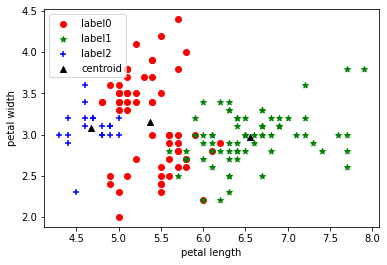

In [8]:
#绘制k-means结果
x0 = X[labels[:,0] == 0]
x1 = X[labels[:,0] == 1]
x2 = X[labels[:,0] == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(center[:,0], center[:,1], c = "black", marker='^', label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='best')
plt.show()

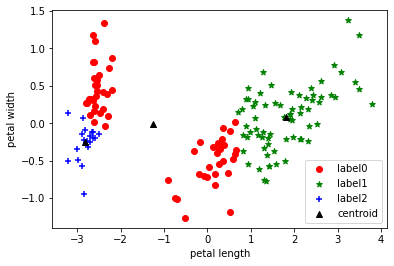

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components 生成特征的维度，这里我们生成2维
pca.fit(X) #pca训练
#训练后将数据降维至2维
X_pca = pca.transform(X)
center_pca = pca.transform(center)
#绘制k-means结果
x0 = X_pca[labels[:,0] == 0]
x1 = X_pca[labels[:,0] == 1]
x2 = X_pca[labels[:,0] == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(center_pca[:,0], center_pca[:,1], c = "black", marker='^', label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='best')
plt.show()